<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

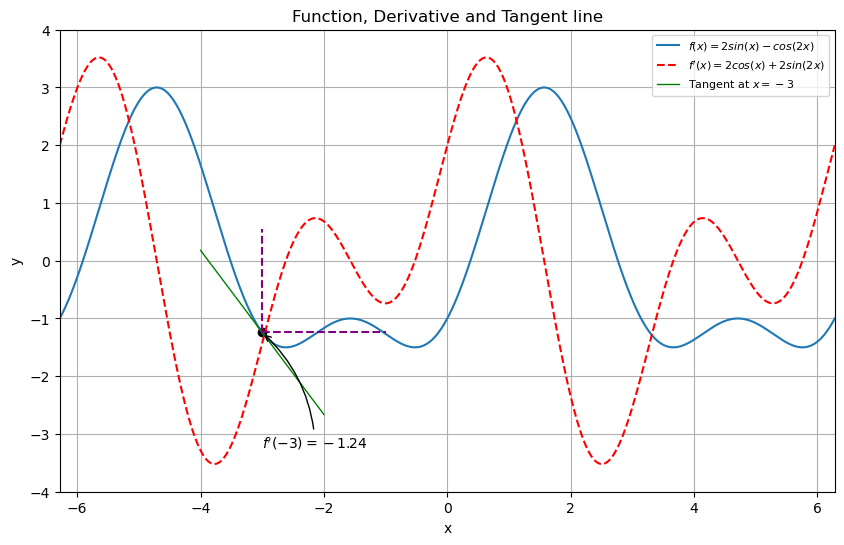

In [15]:
def beauty_derivative_plot(x0):
    f1 = lambda x: 2*np.sin(x) - np.cos(2*x)
    f2 = lambda x: 2*np.cos(x) + 2*np.sin(2*x)
    f3 = lambda x0, x: f2(x0)*(x-x0)+f1(x0)  
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    plt.figure(figsize=(10,6))
    plt.title("Function, Derivative and Tangent line")
    plt.plot(x, f1(x), label="$f(x)=2sin(x)-cos(2x)$")
    plt.plot(x, f2(x), "r--", label="$f'(x)=2cos(x)+2sin(2x)$")
    plt.plot([x0-1, x0+1], [f3(x0, x0-1), f3(x0, x0+1)], "g", label=f'Tangent at $x={x0}$', lw=1.0)
    plt.scatter(x0, f1(x0), color="black")
    plt.plot([x0, x0 + 2], [f1(x0), f1(x0)], "purple", ls = "--")
    plt.plot([x0, x0], [f1(x0), f1(x0) + 1.8], "purple", ls = "--")
    plt.annotate("$f'({})={:.2f}$".format(x0, f1(x0)), 
                 xy=(x0, f1(x0)), xytext=(x0, f1(x0)-2),
                 arrowprops=dict(arrowstyle = "->", connectionstyle = "arc3, rad=0.2"))
    plt.legend(loc="upper right", prop={'size' : 8})
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis([-2*np.pi, 2*np.pi, -4, 4])
    plt.grid(True)
    plt.show()
beauty_derivative_plot(-3)

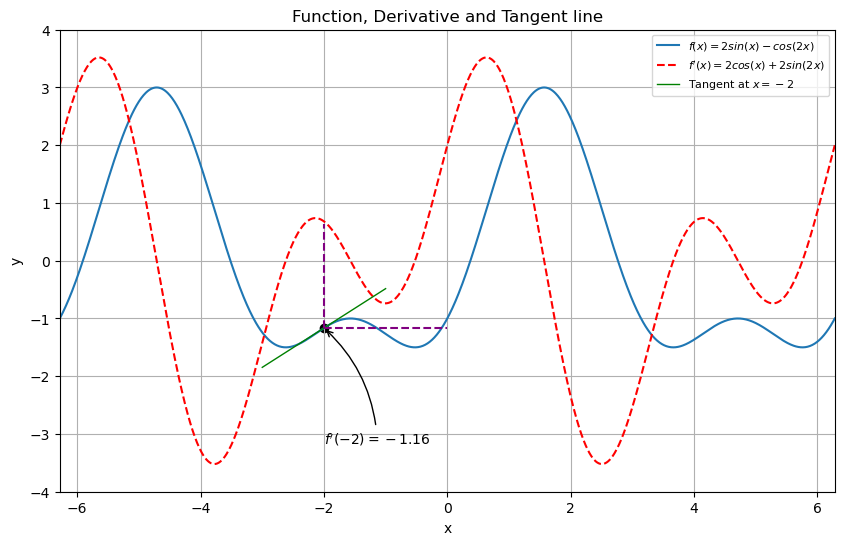

In [17]:
beauty_derivative_plot(-2)

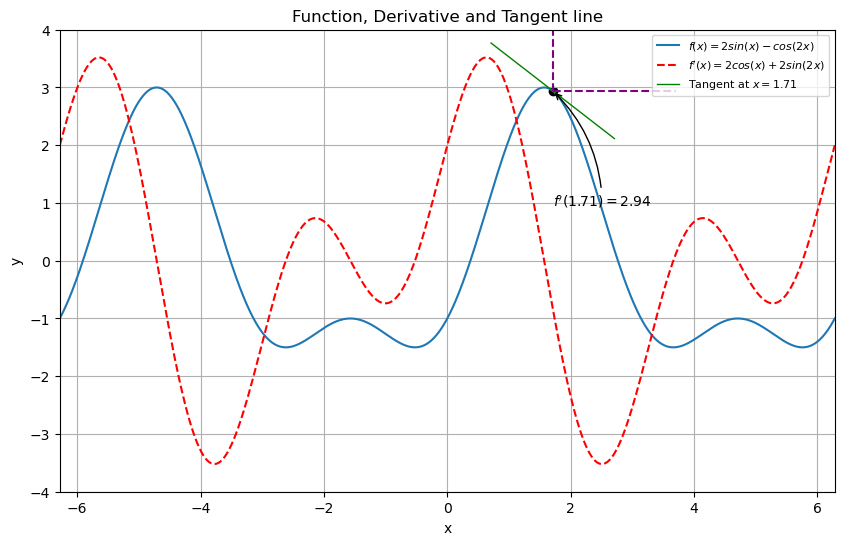

In [19]:
beauty_derivative_plot(1.71)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [7]:
data = np.loadtxt('populations.txt')

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

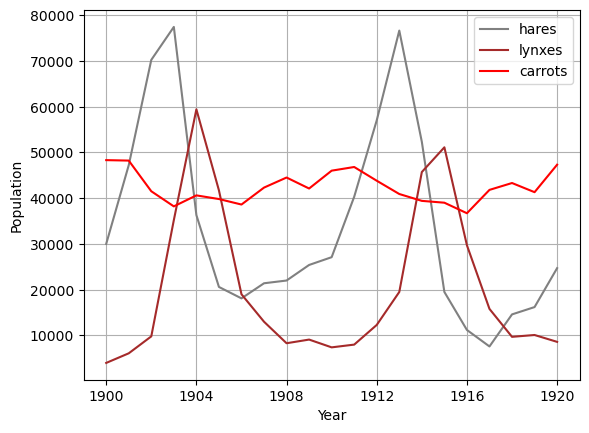

In [9]:
years = data[ :, 0]
hares = data[ :, 1]
lynxes = data[ :, 2]
carrots = data[ :, 3]
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(years, hares, "grey", label="hares")
plt.plot(years, lynxes, "brown", label="lynxes")
plt.plot(years, carrots, "r", label="carrots")
plt.xticks(np.arange(1900, 1921, 4))
plt.yticks(np.arange(10000, 90000, 10000))
plt.grid(True)
plt.legend(loc=1)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

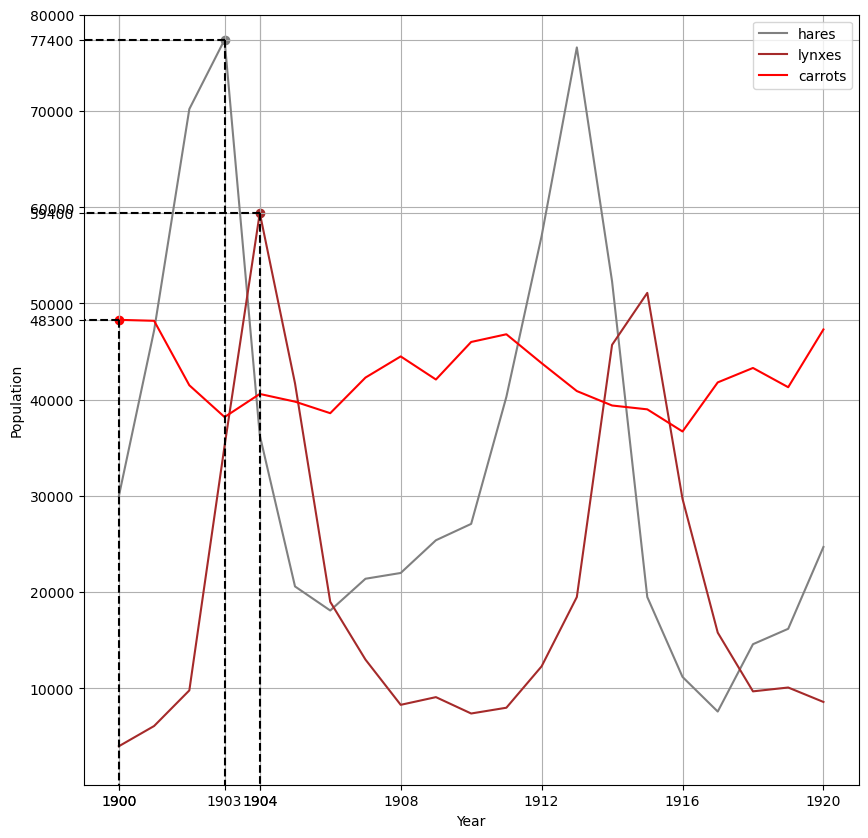

In [163]:
year_hares = 1900 + np.argmax(hares)
hmax = np.max(hares)
year_lynx = 1900 + np.argmax(lynxes)
lmax = np.max(lynxes)
year_carr = 1900 + np.argmax(carrots)
cmax = np.max(carrots)
plt.figure(figsize=(10, 10))
plt.xlabel("Year")
plt.ylabel("Population")
plt.plot(years, hares, "grey", label="hares")
plt.plot(years, lynxes, "brown", label="lynxes")
plt.plot(years, carrots, "r", label="carrots")
plt.xlim(1899, 1921)
plt.ylim(0, 80000)
plt.scatter(year_hares, hmax, color = "grey")
plt.scatter(year_lynx, lmax, color = "brown")
plt.scatter(year_carr, cmax, color = "r")
plt.plot([year_hares, year_hares], [hmax, 0], "black", ls = "--")
plt.plot([year_lynx, year_lynx], [lmax, 0], "black", ls = "--")
plt.plot([year_carr, year_carr], [cmax, 0], "black", ls = "--")
plt.plot([year_hares, 1899], [hmax, hmax], "black", ls = "--")
plt.plot([year_lynx, 1899], [lmax, lmax], "black", ls = "--")
plt.plot([year_carr, 1899], [cmax, cmax], "black", ls = "--")
plt.xticks(np.append(np.arange(1900, 1921, 4), [year_hares, year_lynx, year_carr]))
plt.yticks(np.append(np.arange(10000, 90000, 10000), [hmax, lmax, cmax]))
plt.grid(True)
plt.legend(loc=1)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

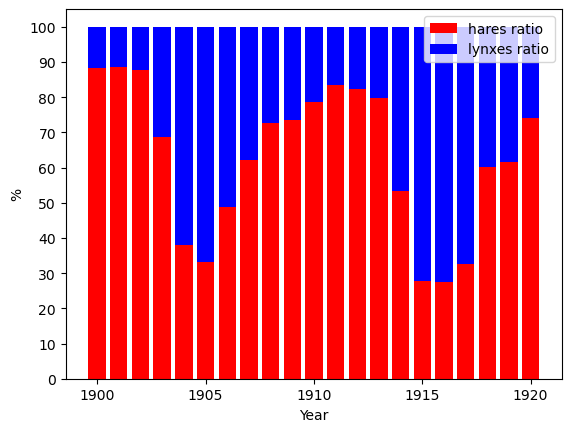

In [185]:
total = hares + lynxes
h_percent = (hares/total) * 100
l_percent = (lynxes/total) * 100
plt.bar(years, h_percent, label = "hares ratio", color = "r")
plt.bar(years, l_percent, bottom = h_percent, label = "lynxes ratio", color ="b")
plt.yticks(np.arange(0, 110, 10))
plt.xlabel("Year")
plt.ylabel("%")
plt.legend(loc = 1)
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

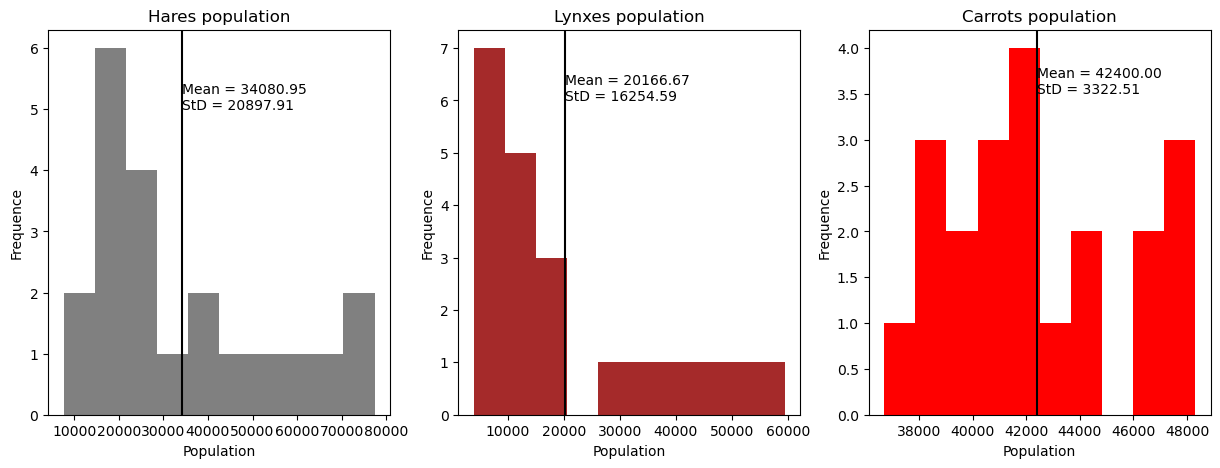

In [17]:
h_mean = np.mean(hares)
l_mean = np.mean(lynxes)
c_mean = np.mean(carrots)
h_std = np.std(hares)
l_std = np.std(lynxes)
c_std = np.std(carrots)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("Hares population")
plt.xlabel("Population")
plt.ylabel("Frequence")
plt.hist(hares, bins = 10, color = "grey")
plt.axvline(h_mean, color = "black")
plt.text(h_mean, 5, f'Mean = {h_mean:.2f}\nStD = {h_std:.2f}')
plt.subplot(132)
plt.title("Lynxes population")
plt.xlabel("Population")
plt.ylabel("Frequence")
plt.hist(lynxes, bins = 10, color = "brown")
plt.axvline(l_mean, color = "black")
plt.text(l_mean, 6, f'Mean = {l_mean:.2f}\nStD = {l_std:.2f}')
plt.subplot(133)
plt.title("Carrots population")
plt.xlabel("Population")
plt.ylabel("Frequence")
plt.hist(carrots, bins = 10, color = "red")
plt.axvline(c_mean, color = "black")
plt.text(c_mean, 3.5, f'Mean = {c_mean:.2f}\nStD = {c_std:.2f}')
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

[H, H, H, H, L, L, L, H, H, H, H, H, H, H, H, L, L, L, H, H, H]


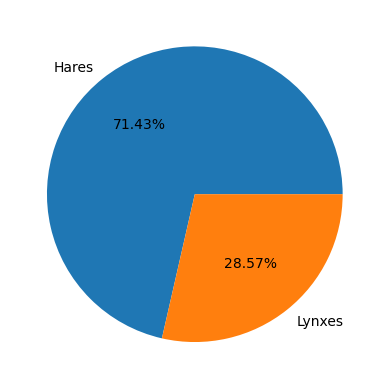

In [245]:
result = np.where(hares > lynxes, "H", "L")
h_largest = np.count_nonzero(result == "H")
l_largest = np.count_nonzero(result == "L")
print(f"[{', '.join(result)}]")
plt.pie([h_largest, l_largest], labels = ["Hares", "Lynxes"], autopct = "%.2f%%")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

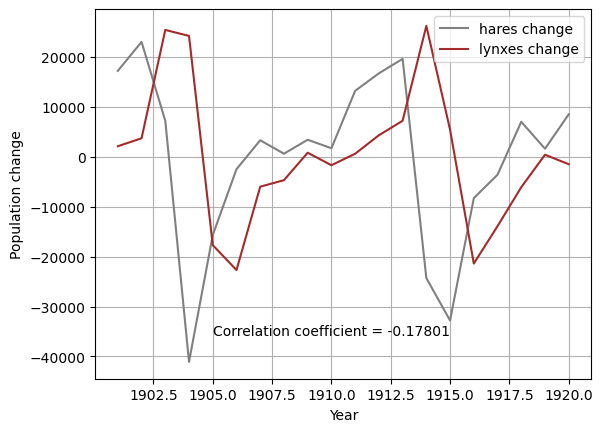

In [297]:
#r = np.sum((hares - h_mean)*(lynxes - l_mean))/np.sqrt(np.sum(((hares - h_mean)**2) * (lynxes - l_mean)**2)) #Коэффициент корреляции Пирсона
hares_change = np.diff(hares)
lynxes_change = np.diff(lynxes)
plt.plot(years[1:], hares_change, "grey", label = "hares change")
plt.plot(years[1:], lynxes_change, "brown", label = "lynxes change")
plt.xlabel("Year")
plt.ylabel("Population change")
plt.text(1910, -35000, f'Correlation coefficient = {np.corrcoef(hares_change, lynxes_change)[0, 1]:.5f}', va = "center", ha = "center")
plt.grid(True)
plt.legend()
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

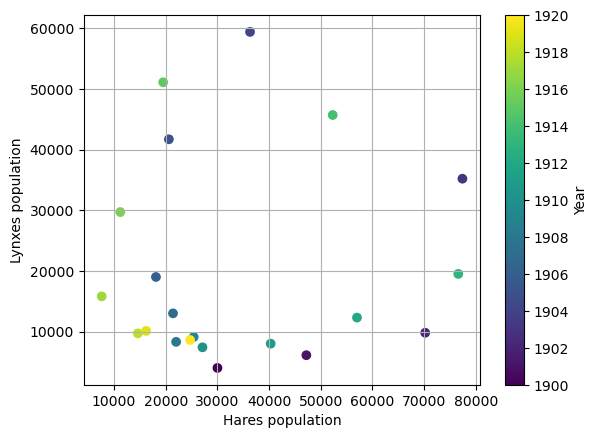

In [315]:
plt.scatter(hares, lynxes, c=years)
plt.xlabel("Hares population")
plt.ylabel("Lynxes population")
plt.colorbar(ticks = np.arange(1900, 1921, 2), label = "Year")
plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [362]:
error = lambda x, y: np.abs(x-y)/y

In [376]:
#Через среднее значение
est_hare20 = np.mean(hares[:20])
true_hare20 = hares[20]
print(f'Estimated: {est_hare20}\nTrue: {true_hare20}\nRatio of the error: {100*error(est_hare20, true_hare20):.2f}%')

Estimated: 34550.0
True: 24700.0
Ratio of the error: 39.88%


In [378]:
#Через обычную интерполяцию
est_hare20 = np.interp(1920, years[:20], hares[:20])
print(f'Estimated: {est_hare20}\nTrue: {true_hare20}\nRatio of the error: {100*error(est_hare20, true_hare20):.2f}%')

Estimated: 16200.0
True: 24700.0
Ratio of the error: 34.41%


In [382]:
#Через полиномиальное интерполирование
est_hare20 = np.polyval(np.polyfit(years[:20], hares[:20], 1), 1920)
print(f'Estimated: {est_hare20}\nTrue: {true_hare20}\nRatio of the error: {100*error(est_hare20, true_hare20):.2f}%')

Estimated: 19775.789473683573
True: 24700.0
Ratio of the error: 19.94%
